In [722]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
import seaborn as sns

In [724]:
df = pd.read_csv("Egypt_Houses_Price.csv")
df.sample(5)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
20293,Stand Alone Villa,7500000,6,6,296.0,Unknown,Unknown,Lake West,Installment,Unknown,Unknown,Sheikh Zayed
933,Apartment,4253600,3.0,2.0,161.0,No,8,ZED Towers,Installment,Ready to move,Finished,Sheikh Zayed
20543,Stand Alone Villa,6300000,4,4,345.0,Yes,Unknown,Unknown,Cash,Ready to move,Finished,Sheikh Zayed
13768,Twin house,5800000,3,3,155.0,No,Ground,Mountain View North Coast,Installment,2024,Finished,North Coast
24475,Stand Alone Villa,7500000,3,3,270.0,No,Unknown,Madinaty,Cash,Ready to move,Not Finished,Madinaty


In [726]:
df.shape

(27361, 12)

In [728]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [736]:
df.dropna(inplace=True)

In [738]:
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [740]:
df.shape

(26692, 12)

In [742]:
df['Bedrooms'] = df.Bedrooms.astype(int)
df['Bathrooms'] = df.Bedrooms.astype(int)

# <font color='purple'>To know if they are correlated to our target</font>

In [745]:
df['Compound'].astype('category').cat.codes.corr(df['Price'])

-0.11513106540309365

In [747]:
df.drop(['Delivery_Date','Delivery_Term','Compound'],axis=1,inplace=True)
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
0,Duplex,4000000.0,3,3,400.0,No,7,Cash,Nasr City
1,Apartment,4000000.0,3,3,160.0,No,10+,Cash,Camp Caesar
2,Apartment,2250000.0,3,3,165.0,No,1,Cash,Smoha
3,Apartment,1900000.0,3,3,230.0,No,10,Cash,Nasr City
4,Apartment,5800000.0,2,2,160.0,No,Ground,Cash,New Cairo - El Tagamoa


In [749]:
df.shape

(26692, 9)

In [751]:
df.City = df.City.apply(lambda x: x.strip())
location = df.groupby('City')['City'].agg('count').sort_values(ascending = False)
location

City
New Cairo - El Tagamoa    6523
North Coast               6327
Sheikh Zayed              2313
Ain Sukhna                1706
6th of October            1703
                          ... 
Quesna                       1
Aga                          1
Sadat                        1
Saft El Laban                1
Zohour District              1
Name: City, Length: 178, dtype: int64

In [753]:
len(location[location<=10])

105

In [755]:
location_less_10 = location[location<=10]
location_less_10

City
Al Ibrahimiyyah    10
Abu Talat          10
Bolkly             10
Stanley            10
Almazah            10
                   ..
Quesna              1
Aga                 1
Sadat               1
Saft El Laban       1
Zohour District     1
Name: City, Length: 105, dtype: int64

In [757]:
df[df['City']=="(View phone number)"].shape

(50, 9)

In [759]:
df.drop(df[df['City']=="(View phone number)"].index,inplace=True)

In [1]:
df.City = df.City.apply(lambda x:'others' if x in location_less_10 else x)

NameError: name 'df' is not defined

In [763]:
len(df.City.unique())

73

In [765]:
df = df[df['Price'] != 'Unknown']
df.shape

(26642, 9)

In [767]:
df.Type.unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [769]:
df['Type'] = df['Type'].str.title()
df['Type'] = df['Type'].replace({
    'Standalone Villa': 'Standalone Villa',
    'Stand Alone Villa': 'Standalone Villa'
})
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin House', 'Town House'], dtype=object)

In [771]:
df['Type'].value_counts()

Type
Apartment           8498
Chalet              6580
Standalone Villa    4609
Town House          3055
Twin House          2266
Duplex               860
Penthouse            526
Studio               248
Name: count, dtype: int64

In [773]:
df = df[~df['Type'].isin(['Penthouse', 'Studio'])]

In [775]:
df['Type'].value_counts()

Type
Apartment           8498
Chalet              6580
Standalone Villa    4609
Town House          3055
Twin House          2266
Duplex               860
Name: count, dtype: int64

In [777]:
df['Level'].value_counts()

Level
Unknown    9717
Ground     4710
2          3549
1          3493
3          1928
4           807
5           539
10+         251
6           220
7           214
8           128
Highest     111
9           102
10           99
Name: count, dtype: int64

In [779]:
df.drop(df[(df['Level'] == '10+') | (df['Level'] == 'Highest')].index, inplace=True)

In [781]:
df['Level'].value_counts()

Level
Unknown    9717
Ground     4710
2          3549
1          3493
3          1928
4           807
5           539
6           220
7           214
8           128
9           102
10           99
Name: count, dtype: int64

In [783]:
type_level_counts = df.groupby(['Type', 'Level']).size().unstack(fill_value=0)
type_level_counts

Level,1,10,2,3,4,5,6,7,8,9,Ground,Unknown
Type,,,,,,,,,,,,
Apartment,1317,94,2139,1612,709,498,204,192,116,96,1283,0
Chalet,2063,2,1260,222,73,16,6,16,11,4,1949,866
Duplex,66,3,106,89,23,25,10,5,1,2,477,22
Standalone Villa,11,0,22,3,0,0,0,0,0,0,319,4253
Town House,26,0,10,2,1,0,0,1,0,0,384,2631
Twin House,10,0,12,0,1,0,0,0,0,0,298,1945


In [785]:
df.drop(df[(df['Level'] == 'Unknown') & (df['Type'].isin(['Chalet', 'Duplex']))].index, inplace=True)

In [787]:
type_level_counts = df.groupby(['Type', 'Level']).size().unstack(fill_value=0)
type_level_counts

Level,1,10,2,3,4,5,6,7,8,9,Ground,Unknown
Type,,,,,,,,,,,,
Apartment,1317,94,2139,1612,709,498,204,192,116,96,1283,0
Chalet,2063,2,1260,222,73,16,6,16,11,4,1949,0
Duplex,66,3,106,89,23,25,10,5,1,2,477,0
Standalone Villa,11,0,22,3,0,0,0,0,0,0,319,4253
Town House,26,0,10,2,1,0,0,1,0,0,384,2631
Twin House,10,0,12,0,1,0,0,0,0,0,298,1945


In [789]:
typesupdate = ['Town House', 'Standalone Villa','Twin House']
df.loc[(df['Type'].isin(typesupdate)) & (df['Level'] == 'Unknown'), 'Level'] = '-1'

In [791]:
type_level_counts = df.groupby(['Type', 'Level']).size().unstack(fill_value=0)
type_level_counts

Level,-1,1,10,2,3,4,5,6,7,8,9,Ground
Type,,,,,,,,,,,,
Apartment,0,1317,94,2139,1612,709,498,204,192,116,96,1283
Chalet,0,2063,2,1260,222,73,16,6,16,11,4,1949
Duplex,0,66,3,106,89,23,25,10,5,1,2,477
Standalone Villa,4253,11,0,22,3,0,0,0,0,0,0,319
Town House,2631,26,0,10,2,1,0,0,1,0,0,384
Twin House,1945,10,0,12,0,1,0,0,0,0,0,298


In [793]:
df.sample(5)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
12938,Chalet,280000.0,2,2,100.0,No,1,Cash or Installment,Ain Sukhna
19887,Twin House,12000000.0,4,4,362.0,Unknown,-1,Cash,New Cairo - El Tagamoa
17372,Standalone Villa,9500000.0,5,5,442.0,No,-1,Installment,North Coast
2818,Apartment,1150000.0,3,3,190.0,No,2,Cash,Haram
380,Apartment,3150000.0,3,3,174.0,No,4,Cash,New Cairo - El Tagamoa


In [795]:
df['Level'] = df['Level'].str.replace("Ground",'0')

In [797]:
df['Level'].unique()

array(['7', '1', '10', '0', '3', '2', '9', '4', '5', '8', '6', '-1'],
      dtype=object)

In [799]:
df['Level'] = df['Level'].astype(int)

In [801]:
df['Furnished'] = df['Furnished'].str.replace('Unknown','No')

In [803]:
paymentupdate = ['Apartment', 'Chalet', 'Town House','Duplex']
df.loc[(df['Type'].isin(paymentupdate)) & (df['Payment_Option'] == 'Unknown Payment'), 'Payment_Option'] = 'Cash or Installment'

In [805]:
paymentupdate2 = ['Standalone Villa', 'Twin House']
df.loc[(df['Type'].isin(paymentupdate2)) & (df['Payment_Option'] == 'Unknown Payment'), 'Payment_Option'] = 'Cash'

In [807]:
type_level_counts = df.groupby(['Type', 'Payment_Option']).size().unstack(fill_value=0)
type_level_counts

Payment_Option,Cash,Cash or Installment,Installment
Type,,,
Apartment,3364,3716,1180
Chalet,1123,3595,904
Duplex,291,409,107
Standalone Villa,2779,1372,457
Town House,630,1827,598
Twin House,1233,691,342


In [809]:
for col in df.drop(['Area','Price','Bedrooms','Bathrooms'],axis='columns').columns:
    print(f'{col} : {df[col].unique()}')

Type : ['Duplex' 'Apartment' 'Chalet' 'Standalone Villa' 'Twin House'
 'Town House']
Furnished : ['No' 'Yes']
Level : [ 7  1 10  0  3  2  9  4  5  8  6 -1]
Payment_Option : ['Cash' 'Cash or Installment' 'Installment']
City : ['Nasr City' 'Smoha' 'New Cairo - El Tagamoa' 'Sheikh Zayed'
 'Shorouk City' 'Gesr Al Suez' 'New Capital City' 'New Damietta'
 'Zahraa Al Maadi' '6th of October' 'Mansura' 'New Heliopolis' 'others'
 'Badr City' 'Borg al-Arab' 'Mohandessin' 'Glim' 'Ain Sukhna' 'Maadi'
 'Hadayek 6th of October' 'Madinaty' 'Haram' 'Ismailia City'
 '10th of Ramadan' 'Heliopolis' 'Rehab City' 'Hadayek al-Ahram'
 'North Coast' 'Sidi Beshr' 'Nakheel' 'Obour City' 'Hurghada' 'Tanta'
 'Helmeyat El Zaytoun' 'Mokattam' 'Katameya' 'Alamein' 'Miami'
 'Hadayek al-Kobba' 'Mostakbal City' 'Agami' 'Ras al-Bar' 'Mandara'
 '15 May City' 'Maamoura' 'Seyouf' 'Sharq District' 'Laurent'
 'New Mansoura' 'Dokki' 'Sheraton' 'Faisal' 'Roushdy' 'Zagazig'
 'San Stefano' 'Moharam Bik' 'West Somid' 'Asafra' 'Gou

In [811]:
df[df.Area/df.Bedrooms<7].head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
2280,Apartment,3200000.0,4,4,20.0,No,4,Cash or Installment,New Capital City
6990,Apartment,1128000.0,3,3,14.0,No,3,Installment,New Cairo - El Tagamoa
7345,Apartment,1500000.0,3,3,10.0,No,4,Cash or Installment,New Cairo - El Tagamoa
15977,Chalet,3000000.0,2,2,12.0,No,0,Cash,North Coast
24905,Standalone Villa,29000000.0,5,5,11.0,No,-1,Cash,New Cairo - El Tagamoa


In [813]:
df.drop(df[df.Area/df.Bedrooms<8].index,inplace=True)

In [815]:
df[df['Bathrooms'] > df['Bedrooms']]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City


In [817]:
df.Price.describe().round(1)

count        24613.0
mean       4534665.3
std        5696051.8
min          30000.0
25%        1200000.0
50%        2731000.0
75%        5869000.0
max      205000000.0
Name: Price, dtype: float64

In [819]:
df = df[~((df['Price'] < 300000 ) | (df['Price'] >= 50000000))]

In [821]:
df['Price_per_Area'] = (df['Price']/df['Area']).round(2)
df.sample(3)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Price_per_Area
21196,Twin House,800000.0,2,2,155.0,No,-1,Installment,North Coast,5161.29
15813,Chalet,2600000.0,2,2,165.0,No,0,Cash or Installment,North Coast,15757.58
1453,Apartment,1950000.0,3,3,116.0,No,1,Cash,Madinaty,16810.34


In [823]:
def remove_outliers(df):
    data = pd.DataFrame()
    for key,subdf in df.groupby('Type'):
        m = np.mean(subdf.Price_per_Area)
        s = np.std(subdf.Price_per_Area)
        smalldata = subdf[(subdf.Price_per_Area>=(m-s))& (subdf.Price_per_Area<=(m+s))]
        data = pd.concat([data,smalldata],ignore_index = True)
    return data
df = remove_outliers(df)
df.shape

(17266, 10)

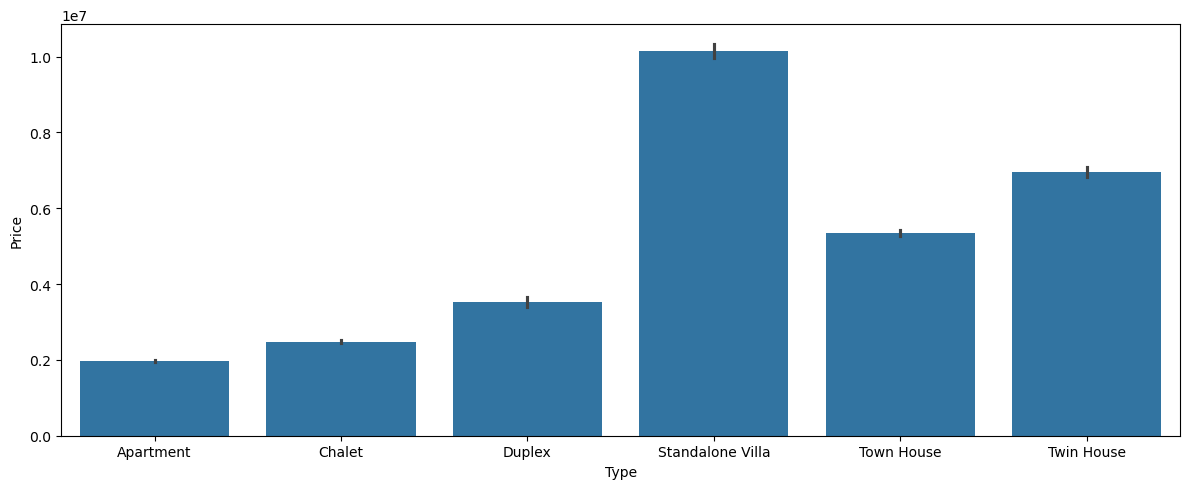

In [825]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Type', y='Price')
plt.tight_layout()
plt.show()

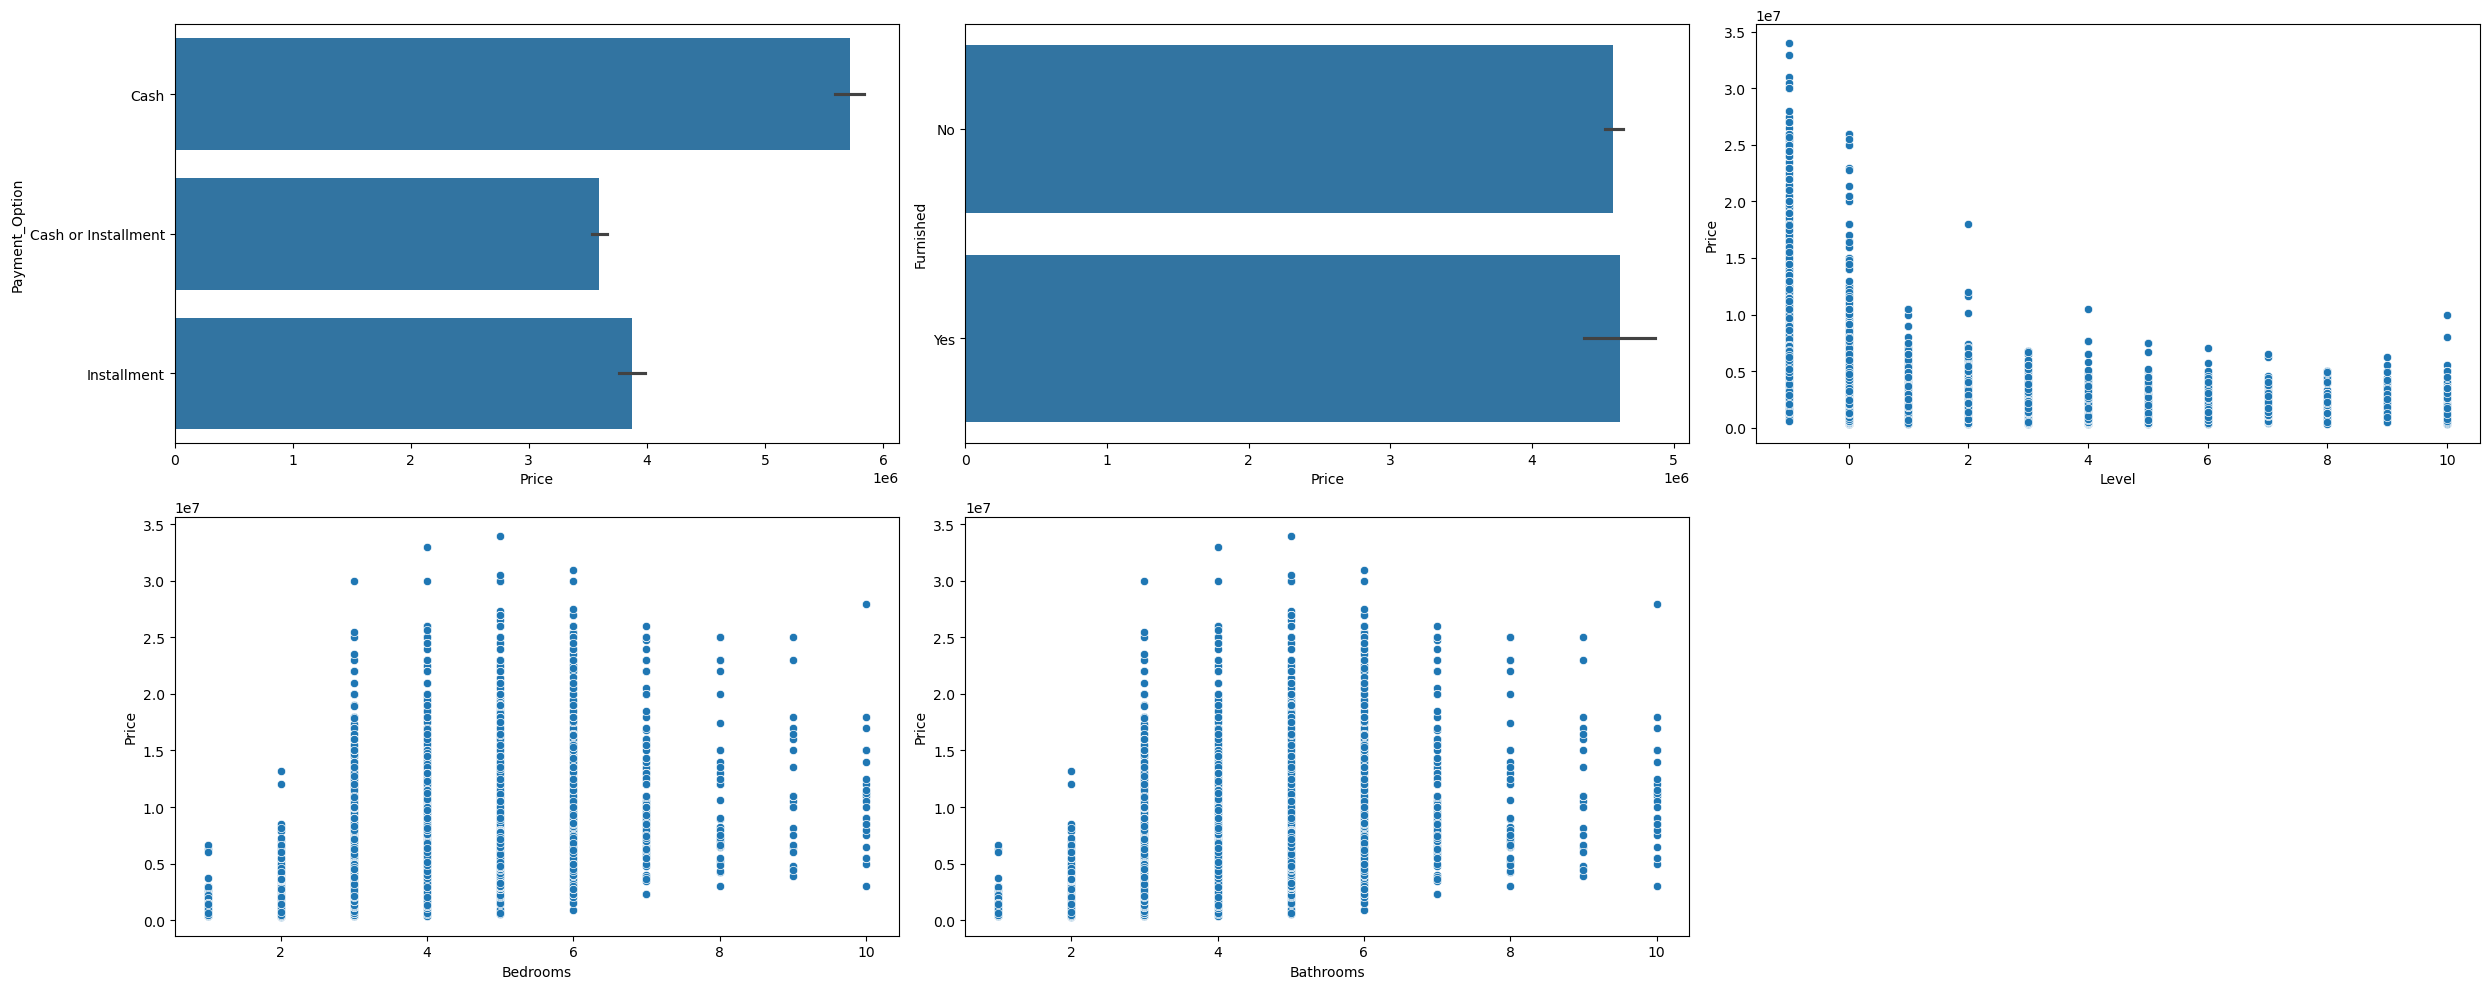

In [826]:
fig,axs = plt.subplots(2,3,figsize=(25,10))
sns.barplot(data=df, x='Price', y='Payment_Option',ax=axs[0,0])
sns.barplot(data=df, x='Price', y='Furnished',ax=axs[0,1])
sns.scatterplot(data=df,x='Level',y='Price',ax=axs[0,2])
sns.scatterplot(data=df,x='Bedrooms',y='Price',ax=axs[1,0])
sns.scatterplot(data=df,x='Bathrooms',y='Price',ax=axs[1,1])
axs[1,2].axis('off')
plt.tight_layout()
plt.show()

In [829]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [831]:
df['Furnished'] = df['Furnished'].replace({
    'No': 0,
    'Yes': 1
})
df['Furnished'].unique()

array([0, 1], dtype=int64)

In [833]:
df['Payment_Option'] = df['Payment_Option'].map({'Cash' : 0 , 'Installment' : 1,'Cash or Installment' : 2})
df['Payment_Option'].unique()

array([0, 2, 1], dtype=int64)

In [835]:
types = ['Apartment','Chalet','Duplex','Town House','Twin House','Standalone Villa']

In [837]:
oe = OrdinalEncoder(categories=[types])

In [839]:
oe.fit_transform(df[['Type']])

array([[0.],
       [0.],
       [0.],
       ...,
       [4.],
       [4.],
       [4.]])

In [841]:
df['Type'] = oe.fit_transform(df[['Type']])
df.Type.unique()

array([0., 1., 2., 5., 3., 4.])

In [843]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [845]:
ohe_transform = ohe.fit_transform(df[['City']])
ohe_transform

,City_10th of Ramadan,City_15 May City,City_6th of October,City_Agami,City_Ain Shams,City_Ain Sukhna,City_Alamein,City_Amreya,City_Asafra,City_Asyut City,...,City_Shubra,City_Sidi Beshr,City_Smoha,City_Tanta,City_West Somid,City_Zagazig,City_Zahraa Al Maadi,City_Zamalek,City_Zezenia,City_others
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17264,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [847]:
df = pd.concat([df,ohe_transform],axis='columns')
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Price_per_Area,...,City_Shubra,City_Sidi Beshr,City_Smoha,City_Tanta,City_West Somid,City_Zagazig,City_Zahraa Al Maadi,City_Zamalek,City_Zezenia,City_others
0,0.0,2250000.0,3,3,165.0,0,1,0,Smoha,13636.36,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1900000.0,3,3,230.0,0,10,0,Nasr City,8260.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1844900.0,4,4,222.0,0,1,2,New Cairo - El Tagamoa,8310.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1650000.0,2,2,144.0,0,1,2,Sheikh Zayed,11458.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1560000.0,3,3,200.0,0,0,2,New Cairo - El Tagamoa,7800.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17261,4.0,8600000.0,6,6,429.0,0,-1,1,New Capital City,20046.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17262,4.0,6800000.0,4,4,450.0,1,-1,2,Hadayek 6th of October,15111.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17263,4.0,6400000.0,4,4,200.0,0,-1,2,North Coast,32000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17264,4.0,6276000.0,3,3,200.0,0,-1,1,6th of October,31380.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


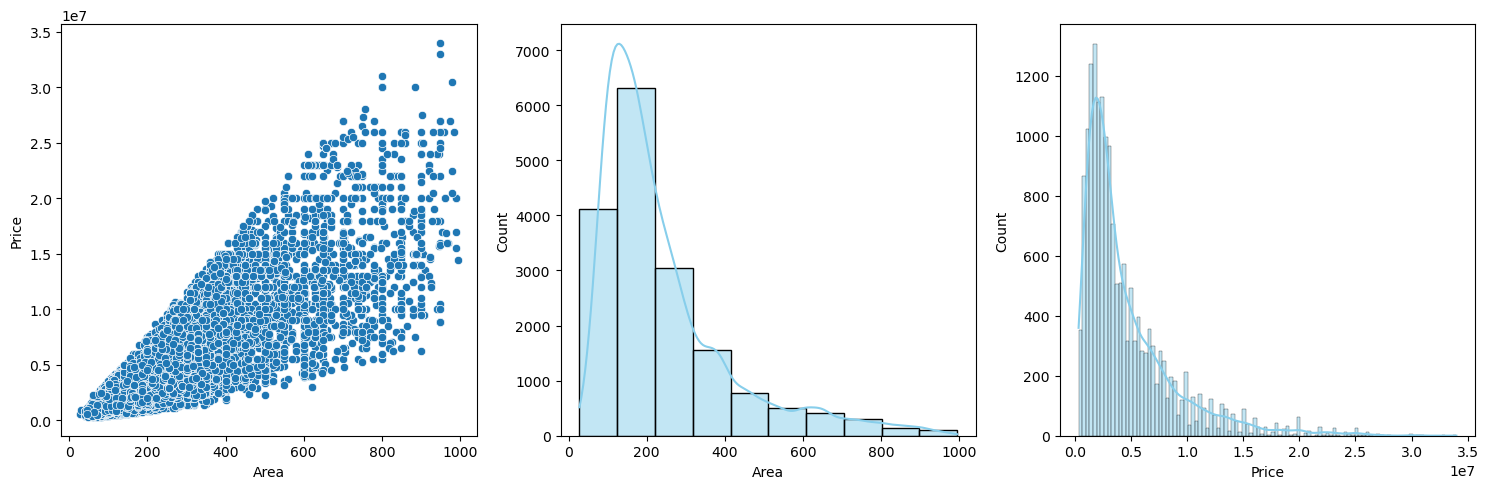

In [849]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='Area', y='Price',ax=axs[0])
sns.histplot(df['Area'], kde=True, color='skyblue', bins=10,ax=axs[1])
sns.histplot(df['Price'], kde=True, color='skyblue',ax=axs[2]) 
plt.tight_layout()
plt.show()

# <font color='red'> bnst3ml Log lama nkon 3yzing n2lbo le normal distribution </font>

In [851]:
df['Log_Price'] = np.log(df['Price'])

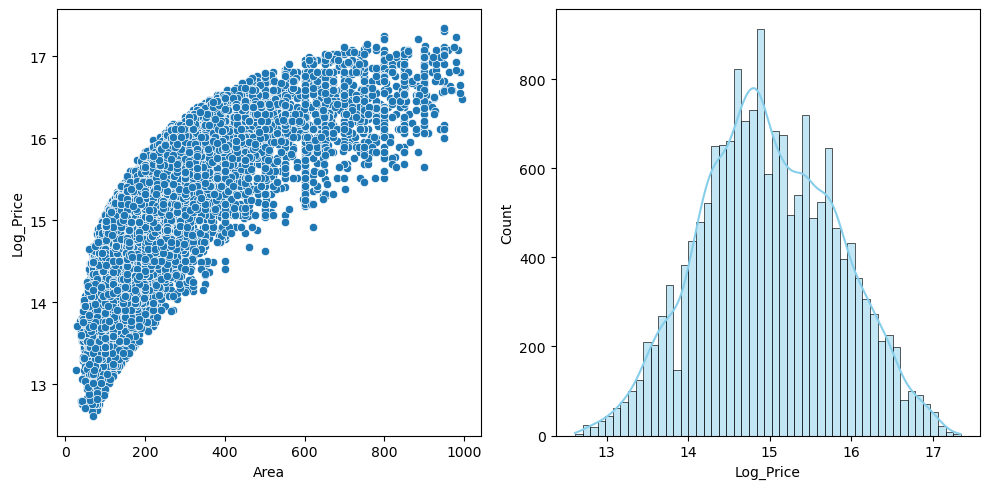

In [854]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=df, x='Area', y='Log_Price',ax=axs[0])
sns.histplot(df['Log_Price'], kde=True, color='skyblue',ax=axs[1])
plt.tight_layout()
plt.show()

In [856]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Price_per_Area,...,City_Sidi Beshr,City_Smoha,City_Tanta,City_West Somid,City_Zagazig,City_Zahraa Al Maadi,City_Zamalek,City_Zezenia,City_others,Log_Price
0,0.0,2250000.0,3,3,165.0,0,1,0,Smoha,13636.36,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.626441
1,0.0,1900000.0,3,3,230.0,0,10,0,Nasr City,8260.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.457364
2,0.0,1844900.0,4,4,222.0,0,1,2,New Cairo - El Tagamoa,8310.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.427936
3,0.0,1650000.0,2,2,144.0,0,1,2,Sheikh Zayed,11458.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.316286
4,0.0,1560000.0,3,3,200.0,0,0,2,New Cairo - El Tagamoa,7800.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.260196


In [858]:
df.drop(['Price','City','Price_per_Area'],axis=1,inplace=True)
df.head()

,Type,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City_10th of Ramadan,City_15 May City,City_6th of October,...,City_Sidi Beshr,City_Smoha,City_Tanta,City_West Somid,City_Zagazig,City_Zahraa Al Maadi,City_Zamalek,City_Zezenia,City_others,Log_Price
0,0.0,3,3,165.0,0,1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.626441
1,0.0,3,3,230.0,0,10,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.457364
2,0.0,4,4,222.0,0,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.427936
3,0.0,2,2,144.0,0,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.316286
4,0.0,3,3,200.0,0,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.260196


In [860]:
x = df.drop(['Log_Price'],axis=1)
y = df['Log_Price']

In [890]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1168]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [1170]:
model = XGBRegressor(max_depth = 15 , max_leaves=15)

In [1172]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=15,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1174]:
model.score(X_test,y_test)

0.8507793167374573

In [1176]:
model.score(X_train,y_train)

0.859407483784764